In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

import tensorflow as tf
tf.config.run_functions_eagerly(True)
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [6]:
fpath = "images/Images"

In [7]:
img_size = 224
batch_size =128
train = tf.keras.utils.image_dataset_from_directory(
  fpath,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size,
  label_mode ="categorical"
)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.


In [8]:
val = tf.keras.utils.image_dataset_from_directory(
  fpath,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size,
  label_mode ="categorical"
)

Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [10]:
class_names = train.class_names

In [14]:
names=[]
for name in class_names :
    names.append(name.split("-")[1]) 
    
print(names[:10]) # Printing some species

['Chihuahua', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese', 'Shih', 'Blenheim_spaniel', 'papillon', 'toy_terrier', 'Rhodesian_ridgeback', 'Afghan_hound']


In [18]:
Model_URL ='https://kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/50-classification/versions/2'
model = Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_size, img_size, 3)),
    hub.KerasLayer(Model_URL),
    tf.keras.layers.Dense(120, activation="softmax")])

In [19]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"] 
  )

In [21]:
model.build((img_size, img_size, 3))

In [23]:
model_name = "model.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

 

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5,
                                                 verbose = 1, restore_best_weights=True)

reduce_lr = tf._keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)

In [25]:
history = model.fit(train, epochs=30, validation_data=val, callbacks=[checkpoint, reduce_lr])

Epoch 1/30
515/515 [==============================] - ETA: 0s - loss: 0.5780 - accuracy: 0.8285
Epoch 1: val_loss improved from 1.08328 to 0.90922, saving model to model.h5
515/515 [==============================] - 119s 230ms/step - loss: 0.5780 - accuracy: 0.8285 - val_loss: 0.9092 - val_accuracy: 0.7427 - lr: 2.0000e-04
Epoch 2/30
515/515 [==============================] - ETA: 0s - loss: 0.4567 - accuracy: 0.8667
Epoch 2: val_loss improved from 0.90922 to 0.90414, saving model to model.h5
515/515 [==============================] - 118s 229ms/step - loss: 0.4567 - accuracy: 0.8667 - val_loss: 0.9041 - val_accuracy: 0.7447 - lr: 2.0000e-04
Epoch 3/30
515/515 [==============================] - ETA: 0s - loss: 0.3974 - accuracy: 0.8887
Epoch 3: val_loss improved from 0.90414 to 0.90287, saving model to model.h5
515/515 [==============================] - 118s 229ms/step - loss: 0.3974 - accuracy: 0.8887 - val_loss: 0.9029 - val_accuracy: 0.7425 - lr: 2.0000e-04
Epoch 4/30
515/515 [=====

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



515/515 [==============================] - ETA: 0s - loss: 0.1427 - accuracy: 0.9742
Epoch 18: val_loss did not improve from 0.90287
515/515 [==============================] - 117s 227ms/step - loss: 0.1427 - accuracy: 0.9742 - val_loss: 0.9894 - val_accuracy: 0.7447 - lr: 1.0000e-04
Epoch 19/30
515/515 [==============================] - ETA: 0s - loss: 0.1369 - accuracy: 0.9754
Epoch 19: val_loss did not improve from 0.90287
515/515 [==============================] - 117s 228ms/step - loss: 0.1369 - accuracy: 0.9754 - val_loss: 0.9977 - val_accuracy: 0.7454 - lr: 1.0000e-04
Epoch 20/30
515/515 [==============================] - ETA: 0s - loss: 0.1315 - accuracy: 0.9773
Epoch 20: val_loss did not improve from 0.90287
515/515 [==============================] - 117s 227ms/step - loss: 0.1315 - accuracy: 0.9773 - val_loss: 1.0038 - val_accuracy: 0.7449 - lr: 1.0000e-04
Epoch 21/30
515/515 [==============================] - ETA: 0s - loss: 0.1264 - accuracy: 0.9781
Epoch 21: val_loss did n

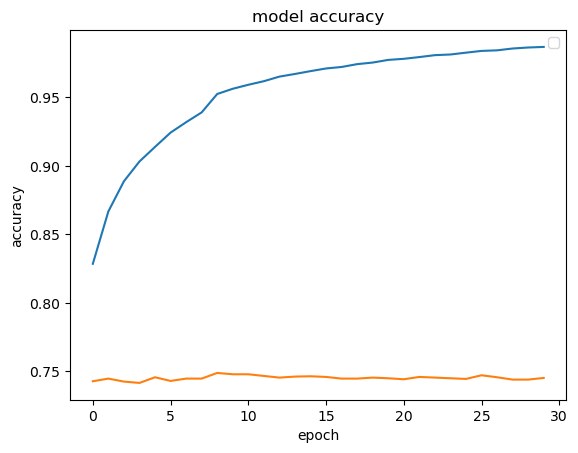

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()